# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# 1. Count the total rides by city type
total_rides = pyber_data_df.set_index("city").groupby("type")["ride_id"].count()

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.set_index("city").groupby("type")["driver_count"].sum()

In [5]:
#  3. Get the total amount of fares for each city type
fare_total = pyber_data_df.set_index("city").groupby("type")["fare"].sum()

In [6]:
#  4. Get the average fare per ride for each city type. 
fare_average = pyber_data_df.set_index("city").groupby("type")["fare"].mean()

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = fare_total / total_drivers

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat([total_rides, total_drivers, fare_total, fare_average, avg_fare_per_driver], 
                             axis=1,
                            keys = ["Total Rides","Total Drivers","Total Fares","Average Fare per Ride","Average Fare per Driver"])

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df.style.format({"Total Rides":"{:,d}",
                              "Total Drivers":"{:,d}",
                             "Total Fares":'${0:,.2f}',
                              "Average Fare per Ride":'${0:,.2f}',
                              "Average Fare per Driver":'${0:,.2f}'})

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame

In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_fares_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_of_fares_df = sum_of_fares_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fares_pivot = sum_of_fares_df.pivot(index="date",columns = "type", values = 'fare')

In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
dates_df = pd.DataFrame(data=total_fares_pivot).loc['2019-01-01':'2019-04-29']

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
dates_df.index = pd.to_datetime(dates_df.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_resample_df = dates_df.resample('W').sum()
weekly_resample_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


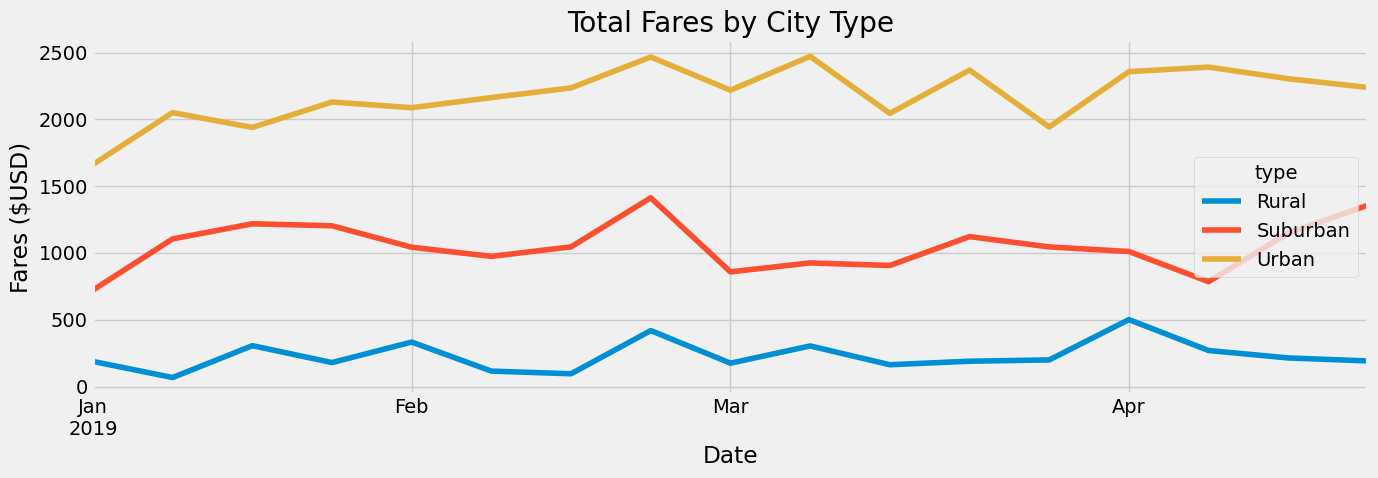

In [19]:
# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_resample_df.plot(xlabel="Date",ylabel="Fares ($USD)",title = "Total Fares by City Type",figsize=(14,5))
plt.tight_layout()
plt.savefig("Fares.png")